In [8]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pylab as plb
import pandas as pd
import scipy
import astropy
import os
import radmc3dPy
from radmc3dPy import *

In [60]:
print(radmc3dPy.params.rdisk)

1496000000000000.0


In [10]:
os.getcwd()

'/Users/Maya/Desktop/radmc3d-2.0/python/radmc3dPy'

In [11]:
os.chdir('/Users/Maya/Desktop/radmc3d-2.0/python/radmc3dPy/')

In [12]:
os.getcwd()

'/Users/Maya/Desktop/radmc3d-2.0/python/radmc3dPy'

## Model setup

To check what models are available:

In [13]:
models.getModelNames()

['lines_nlte_lvg_1d_1',
 'ppdisk',
 'ppdisk_acc',
 'ppdisk_amr',
 'simple_1',
 'spher1d_1',
 'spher2d_1']

In [14]:
dir(models.ppdisk)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'aa',
 'absolute_import',
 'analyze',
 'angs',
 'au',
 'cc',
 'day',
 'dju',
 'dmo',
 'ee',
 'ev',
 'getDefaultParams',
 'getDustDensity',
 'getGasAbundance',
 'getGasDensity',
 'getModelDesc',
 'getVTurb',
 'getVelocity',
 'gg',
 'hh',
 'hour',
 'kev',
 'kk',
 'km',
 'ls',
 'me',
 'mea',
 'micr',
 'mju',
 'mmo',
 'mp',
 'ms',
 'muh2',
 'np',
 'pc',
 'print_function',
 'rea',
 'rju',
 'rmo',
 'rs',
 'ss',
 'st',
 'traceback',
 'ts',
 'warnings',
 'year']

In [15]:
print(float(models.ppdisk.getDefaultParams()[21][1]))

-1.0


How to get a brief description:</font>

In [16]:
print(models.ppdisk.getGasDensity())

AttributeError: 'NoneType' object has no attribute 'x'

In [17]:
dir(models.ppdisk)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'aa',
 'absolute_import',
 'analyze',
 'angs',
 'au',
 'cc',
 'day',
 'dju',
 'dmo',
 'ee',
 'ev',
 'getDefaultParams',
 'getDustDensity',
 'getGasAbundance',
 'getGasDensity',
 'getModelDesc',
 'getVTurb',
 'getVelocity',
 'gg',
 'hh',
 'hour',
 'kev',
 'kk',
 'km',
 'ls',
 'me',
 'mea',
 'micr',
 'mju',
 'mmo',
 'mp',
 'ms',
 'muh2',
 'np',
 'pc',
 'print_function',
 'rea',
 'rju',
 'rmo',
 'rs',
 'ss',
 'st',
 'traceback',
 'ts',
 'warnings',
 'year']

In [ ]:
# change this, specify sig_0 as the sig3 for the black one, do everything
# with the model like before, and make an image for this model, everything
# else the same
# see which model in radmc has exponential cutoff, instead of ppdisk
# exponential cutoff model (ppdisk) and ppdisk

In [61]:
setup.problemSetupDust('ppdisk', mdisk='1e-5*ms', gap_rin='[10.0*au]', gap_rout='[40.*au]', gap_drfact='[1e-5]', nz='0')

Writing problem_params.inp
Writing dustopac.inp
Writing wavelength_micron.inp
Writing amr_grid.inp
Writing stars.inp
-------------------------------------------------------------
Luminosities of radiation sources in the model :
Reading wavelength_micron.inp
As calculated from the input files :
Stars : 
  Star #0 + hotspot        : 3.564346e+33
Continuous starlike source : 0.000000e+00
 
-------------------------------------------------------------
Writing dust_density.binp
Writing radmc3d.inp


In [19]:
models.getModelDesc('ppdisk')

'Generic protoplanetary disk model'

We need master parameter file containing all parameters of the model to create the model. Every model in the library has a default set of parameters. We can create the parameter file:

To read the parameters from this file:

In [20]:
analyze.writeDefaultParfile('ppdisk')

Writing problem_params.inp


In [21]:
par = analyze.readParams()

In [22]:
par.printPar()

# -------------------------------------------------------------------------------------------------------------------------
# Block: Radiation sources
# -------------------------------------------------------------------------------------------------------------------------
incl_cont_stellarsrc      = False  # # Switches on (True) or off (False) continuous stellar sources )
incl_disc_stellarsrc      = True  # # Switches on (True) or off (False) discrete stellar sources)
mstar                     = [1.0*ms]  # # Mass of the star(s)
pstar                     = [0.0, 0.0, 0.0]  # # Position of the star(s) (cartesian coordinates)
rstar                     = [2.0*rs]  # # Radius of the star(s)
staremis_type             = ["blackbody"]  # # Stellar emission type ("blackbody", "kurucz", "nextgen")
tstar                     = [4000.0]  # # Effective temperature of the star(s) [K]
# -----------------------------------------------------------------------------------------------------------------

## Simple setup

Setting up the model and creating all necessary input files for RADMC-3D:

In [23]:
setup.problemSetupDust('ppdisk', mdisk='1e-5*ms', gap_rin='[10.0*au]', gap_rout='[40.*au]', gap_drfact='[1e-5]', nz='0')

Writing problem_params.inp
Writing dustopac.inp
Writing wavelength_micron.inp
Writing amr_grid.inp
Writing stars.inp
-------------------------------------------------------------
Luminosities of radiation sources in the model :
Reading wavelength_micron.inp
As calculated from the input files :
Stars : 
  Star #0 + hotspot        : 3.564346e+33
Continuous starlike source : 0.000000e+00
 
-------------------------------------------------------------
Writing dust_density.binp
Writing radmc3d.inp


If any keyword argument will be passed to problemSetupDust() it will be used to override the parameters in problem_params.inp:

In [24]:
setup.problemSetupDust('ppdisk', mdisk='1e-4*ms')

Writing problem_params.inp
Writing dustopac.inp
Writing wavelength_micron.inp
Writing amr_grid.inp
Writing stars.inp
-------------------------------------------------------------
Luminosities of radiation sources in the model :
Reading wavelength_micron.inp
As calculated from the input files :
Stars : 
  Star #0 + hotspot        : 3.564346e+33
Continuous starlike source : 0.000000e+00
 
-------------------------------------------------------------
Writing dust_density.binp
Writing radmc3d.inp


## Modular setup

Generating input files separately:

In [25]:
model = radmc3dPy.setup.radmc3dModel(model='ppdisk', mdisk='1e-5*ms', gap_rin='[10.0*au]', gap_rout='[40.*au]', gap_drfact='[1e-5]', nz='0')

Writing problem_params.inp


In [26]:
model.writeRadmc3dInp()

Writing radmc3d.inp


In [27]:
model.makeGrid(writeToFile=True)

Writing wavelength_micron.inp
Writing amr_grid.inp


In [28]:
model.makeRadSources(writeToFile=True)

Writing stars.inp
-------------------------------------------------------------
Luminosities of radiation sources in the model :
Reading wavelength_micron.inp
As calculated from the input files :
Stars : 
  Star #0 + hotspot        : 3.564346e+33
Continuous starlike source : 0.000000e+00
 
-------------------------------------------------------------


In [29]:
model.makeDustOpac()

Writing dustopac.inp


In [30]:
model.makeVar(ddens=True, writeToFile=True)

Writing dust_density.binp


## Read the model structure

In [31]:
data = analyze.readData(ddens=True)

Reading amr_grid.inp
Reading wavelength_micron.inp
Reading dust_density.binp


## Diagnostic plots

### Dust density contours

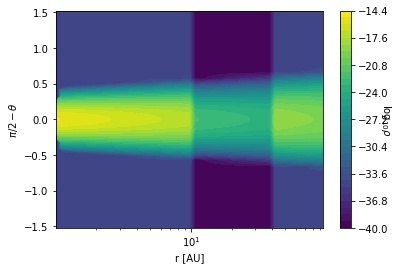

In [32]:
c = plb.contourf(data.grid.x/natconst.au, np.pi/2.-data.grid.y, np.log10(data.rhodust[:,:,0,0].T), 30)
plb.xlabel('r [AU]')
plb.ylabel(r'$\pi/2-\theta$')
plb.xscale('log')
cb = plb.colorbar(c)
cb.set_label(r'$\log_{10}{\rho}$', rotation=270.)

### Dust opacity

##### Changing directory to access dustkappa_silicate.inp

In [33]:
os.chdir('/Users/Maya/Desktop/radmc3d-2.0/python/radmc3dPy/python_examples/datafiles')

In [34]:
opac = analyze.readOpac(ext=['silicate'])

Reading dustkappa_silicate.inp


In [35]:
opac = analyze.readOpac(idust=[0])

Reading dustkappa_silicate.inp


Text(0, 0.5, '$\\kappa_{\\rm abs}$ [cm$^2$/g]')

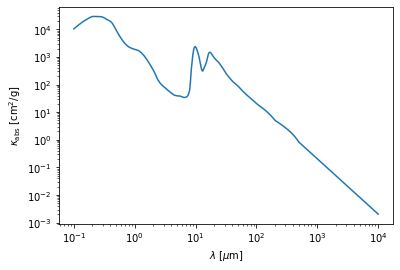

In [36]:
plb.loglog(opac.wav[0], opac.kabs[0])
plb.xlabel(r'$\lambda$ [$\mu$m]')
plb.ylabel(r'$\kappa_{\rm abs}$ [cm$^2$/g]')

### Optical depth

In [37]:
os.chdir('/Users/Maya/Desktop/radmc3d-2.0/python/radmc3dPy/python_examples/datafiles')

In [38]:
data.getTau(wav=0.5)

Reading dustkappa_silicate.inp
Opacity at 0.50um :  28460.764433351476


In [39]:
#os.chdir('/Users/Maya/Desktop/radmc3d-2.0/python/radmc3dPy/')

<a list of 1 text.Text objects>

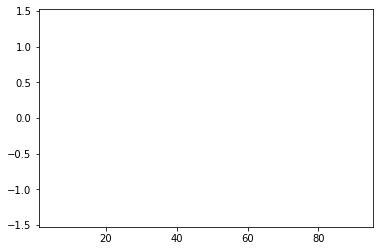

In [40]:
c = plb.contour(data.grid.x/natconst.au, np.pi/2.-data.grid.y, data.taux[:,:,0].T, [1.0],  colors='w', linestyles='solid')
plb.clabel(c, inline=1, fontsize=10)

### Run the thermal MC

In [41]:
import os
os.system('radmc3d mctherm')

32512

### Dust temperature contours

In [42]:
data = analyze.readData(dtemp=True)
data.readDustTemp()

Reading amr_grid.inp
Reading wavelength_micron.inp
Reading dust_temperature.bdat
Reading dust_temperature.bdat


In [43]:
dir(data)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_findDataFile',
 '_isBinary',
 '_scalarfieldReader',
 '_scalarfieldWriter',
 'dusttemp',
 'gastemp',
 'gasvel',
 'getDustMass',
 'getGasMass',
 'getSigmaDust',
 'getSigmaGas',
 'getTau',
 'getTauOneDust',
 'grid',
 'ndens_cp',
 'ndens_mol',
 'octree',
 'readDustDens',
 'readDustTemp',
 'readGasDens',
 'readGasTemp',
 'readGasVel',
 'readVTurb',
 'rhodust',
 'rhogas',
 'sigmadust',
 'sigmagas',
 'taux',
 'tauy',
 'tauz',
 'vturb',
 'writeDustDens',
 'writeDustTemp',
 'writeGasDens',
 'writeGasTemp',
 'writeGasVel',
 'writeVTK',
 'writeVTurb']

In [44]:
print(data.grid)

In [45]:
dir(data.grid)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'act_dim',
 'crd_sys',
 'freq',
 'getCellVolume',
 'grid_style',
 'makeSpatialGrid',
 'makeWavelengthGrid',
 'nfreq',
 'nwav',
 'nx',
 'nxi',
 'ny',
 'nyi',
 'nz',
 'nzi',
 'octree',
 'readGrid',
 'readSpatialGrid',
 'readWavelengthGrid',
 'wav',
 'writeSpatialGrid',
 'writeWavelengthGrid',
 'x',
 'xi',
 'y',
 'yi',
 'z',
 'zi']

In [46]:
#os.chdir('/Users/Maya/Desktop/radmc3d-2.0/python/radmc3dPy/')

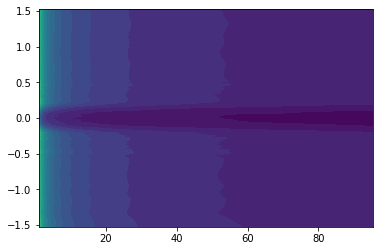

In [47]:
c = plb.contourf(data.grid.x/natconst.au, np.pi/2.-data.grid.y, data.dusttemp[:,:,0,0].T, 30)

<a list of 8 text.Text objects>

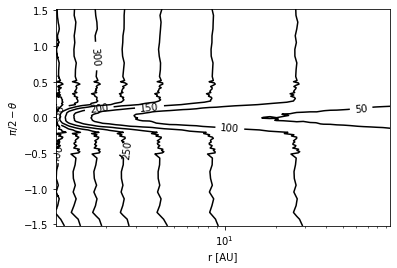

In [48]:
plb.xlabel('r [AU]')
plb.ylabel(r'$\pi/2-\theta$')
plb.xscale('log')
#cb = plb.colorbar(c)
cb.set_label('T [K]', rotation=270.)

c = plb.contour(data.grid.x/natconst.au, np.pi/2.-data.grid.y, data.dusttemp[:,:,0,0].T, 10,  colors='k', linestyles='solid')
plb.clabel(c, inline=1, fontsize=10)

### Convenient 2D contour plots

In [49]:
data.readDustTemp()
data.readDustDens()

Reading dust_temperature.bdat
Reading dust_density.binp


Reading dustkappa_silicate.inp
Opacity at 0.50um :  28460.764433351476


/Users/Maya/Desktop/radmc3d-2.0/python/radmc3dPy/radmc3dPy/analyze.py:1836: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p = ax.pcolormesh(plot_x, plot_y, pdata.T, norm=LogNorm(vmin, vmax), **kwargs)


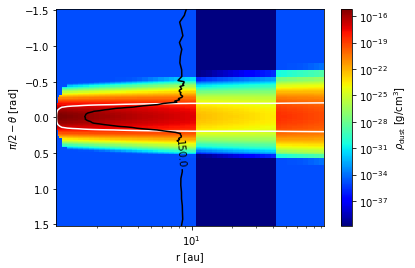

In [50]:
analyze.plotSlice2D(data, var='ddens', plane='xy', log=True, linunit='au', cmap=plb.cm.jet)
plb.xscale('log')
data.getTau(wav=0.5)
analyze.plotSlice2D(data, var='taux', plane='xy', log=True, linunit='au', contours=True, clev=[1.0], clcol='w')
analyze.plotSlice2D(data, var='dtemp', plane='xy', ispec=0, log=True, linunit='au', contours=True, clev=[150.0], clcol='k', cllabel=True)

### Image

In [62]:
os.getcwd() 

'/Users/Maya/Desktop/radmc3d-2.0/python/radmc3dPy/python_examples/datafiles'

##### Make an image

In [52]:
image.makeImage(npix=300., wav=2.2, incl=20., phi=0., sizeau=300.)

Executing RADMC-3D Command:
radmc3d image npix 300 incl 20.0 sizeau 300.0 lambda 2.2 phi 0.0 pointau 0.0  0.0  0.0 fluxcons


0

In [53]:
ls

amr_grid.inp            fig-optdepth.eps        radmc3d.out
dust_density.binp       image.out               stars.inp
dust_temperature.bdat   molecule_co.inp         wavelength_micron.inp
dustkappa_silicate.inp  problem_params.inp
dustopac.inp            radmc3d.inp


In [54]:
im = image.readImage()

Reading image.out


In [55]:
dir(image)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'absolute_import',
 'cmask',
 'copy',
 'getPSF',
 'makeImage',
 'nc',
 'np',
 'os',
 'pf',
 'plotImage',
 'plotPolDir',
 'plt',
 'print_function',
 'radmc3dCircimage',
 'radmc3dImage',
 'readImage',
 'readcircimage',
 'sp',
 'spc',
 'traceback']

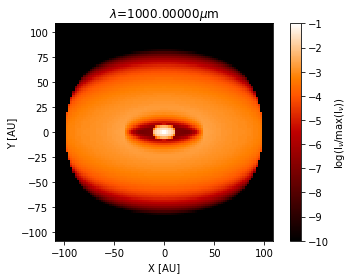

{'implot': <matplotlib.image.AxesImage at 0x12101ba30>,
 'cbar': <matplotlib.colorbar.Colorbar at 0x121076790>}

In [56]:
image.plotImage(im, au=True, log=True, maxlog=10, saturate=0.1, cmap=plb.cm.gist_heat)

Displaying the images using angular coordinates for the image axis (note distance in pc needs also to be passed):

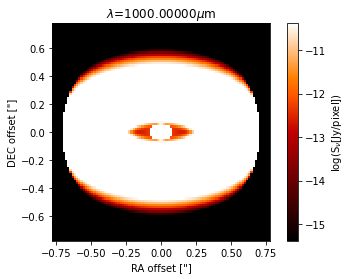

{'implot': <matplotlib.image.AxesImage at 0x121238640>,
 'cbar': <matplotlib.colorbar.Colorbar at 0x1212e9430>}

In [57]:
image.plotImage(im, arcsec=True, dpc=140., log=True, maxlog=10, saturate=1e-5, bunit='snu', cmap=plb.cm.gist_heat)

Convolving the image with an arbitrary 2D gaussian beam:

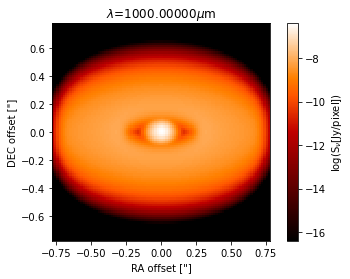

{'implot': <matplotlib.image.AxesImage at 0x12148a460>,
 'cbar': <matplotlib.colorbar.Colorbar at 0x1214d6250>}

In [58]:
cim = im.imConv(fwhm=[0.06, 0.06], pa=0., dpc=140.)
image.plotImage(cim, arcsec=True, dpc=140., log=True, maxlog=10, bunit='snu', cmap=plb.cm.gist_heat)

# read about angular resolution / convolution

### How does gas surface density vary with respect to disk radius

In [59]:
radii = radmc3dPy.params.rdisk 

Text(0.5, 1.0, 'Average Surface Density vs. Radius')

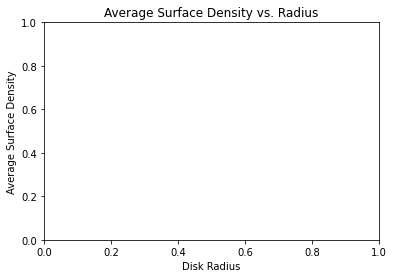

In [425]:
x = np.linspace(0, radii)
#plt.plot(x, y)
plt.xlabel('Disk Radius')
plt.ylabel('Average Surface Density')
plt.title('Average Surface Density vs. Radius')

# ignore

In [504]:
#radmc3dPy.analyze.writeDefaultParfile('ppdisk')
#model = models.ppdisk
#data = analyze.readData(dtemp=True)
#grid = data.grid
#ppar = data.ppar['mstar']
#gas_density = models.ppdisk.getGasDensity(grid=grid, ppar=grid)

In [505]:
#param_description = radmc3dPy.models.ppdisk.getDefaultParams() # param name, value, description
#print(param_description)

# ignore

In [497]:
#model = radmc3dPy.setup.radmc3dModel(model='ppdisk', mdisk='1e-5*ms', gap_rin='[10.0*au]', gap_rout='[40.*au]', gap_drfact='[1e-5]', nz='0')
#model.writeRadmc3dInp()
# model.setupGas() ??
#dir(model)

In [525]:
#radmc3dData_example = radmc3dPy.data.radmc3dData(grid) 
#print(radmc3dPy.data.radmc3dData.getSigmaDust(data))

In [506]:
gas_density = models.ppdisk.getGasDensity(grid=data.grid, ppar=par.ppar) 

In [527]:
# print(gas_density)
#integrate over z to get a 2d array to get it in 2d dimensions

In [528]:
#data.getSigmaGas()
#print(data.sigmagas)

In [ ]:
#print(model.getGasDensity())

#dir(models.ppdisk) data.grid 

#par.printPar()

#dir(radmc3dPy.models.ppdisk)

#models.ppdisk.getDustDensity()